In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pip install openpyxl xlsxwriter xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 2.5 MB/s eta 0:00:00


In [ ]:
def max_eig(A):
    x_n = np.random.rand(A.shape[0])
    tol = 1e-6
    max_iter = 100
    for i in range(max_iter):
        x_n = np.matmul(A, x_n)
        x_n = x_n / np.linalg.norm(x_n)
    w = np.matmul(A, x_n)
    return w[0] / x_n[0]

#  ЮАР


In [ ]:
df = pd.read_excel("./Southafrica.xlsx")
names = df.iloc[7:51, 0]
df = df.iloc[7:57, 2:]

In [ ]:
Z = df.iloc[:44, :44].to_numpy()
X = df.iloc[49, :44].to_numpy()
A = (Z / X).astype(float)
D = (np.eye(44) - A).astype(float)

In [ ]:
for i in range(2, 44):
    if not np.linalg.det(D[:i, :i]):
        print('Not productive')
        print(i)
else:
    print('Productive')

Productive


In [ ]:
eigen_values, v = np.linalg.eig(A)
eps = 1e-6
max_eigen_values = (1 / max(eigen_values)).real
my_max = 1 / max_eig(A)
assert abs(my_max - max_eigen_values) < eps
print(f"Максимально возможный темп роста равен {max_eigen_values:.3}")

Максимально возможный темп роста равен 1.75


# Исключение отрасли из модели межотраслевого баланса

In [ ]:
def industry_exclusion(A, line_numbers_toclear):
    line_numbers_remain = [x for x in range(0, A.shape[0]) if x not in line_numbers_toclear]
    A11 = A[line_numbers_remain, :][:, line_numbers_remain]
    A12 = A[line_numbers_remain, :][:, line_numbers_toclear]
    A21 = A[line_numbers_toclear, :][:, line_numbers_remain]
    A22 = A[line_numbers_toclear, :][:, line_numbers_toclear]
    B = A11 + np.matmul(np.matmul(A12, np.linalg.inv(np.eye(A22.shape[0], A22.shape[1]))), A21)

    val, vect = np.linalg.eig(B)
    max_valB = (1 / max(val)).real
    val, vect = np.linalg.eig(A)
    max_valA = (1 / max(val)).real
    return B, max_valA, max_valB

In [ ]:
[B, max_valA, max_valB] = industry_exclusion(A, [43])
#[B, max_valA, max_valB] = industry_exclusion(A, [1, 4, 27, 30])
print(f"1/max_eigenvalue(A) {max_valA:.4}")
print(f"1/max_eigenvalue(B) {max_valB:.4}")

1/max_eigenvalue(A) 1.747
1/max_eigenvalue(B) 1.751


In [ ]:
names_new = list(map(lambda x:x.split(": ")[1], list(names)))
names_new[35] += ' , ' + names_new[25]
del names_new[25]
names = names_new
X = X_new.reshape(-1)

# Агрегирование матрицы Леонтьева

In [ ]:
def consolidation_industry(A, X, classes):
    B = np.zeros((len(classes), len(classes)))
    x_new = np.zeros((len(classes), 1))
    for j in range(len(classes)):
        x_new[j] = np.sum(X[np.ix_(classes[j])])
        for i in range(len(classes)):
            B[i,j] = np.sum(np.matmul(A[np.ix_(classes[i], classes[j])], X[np.ix_(classes[j])])) / x_new[j]

    val, vect = np.linalg.eig(B)
    max_valB = (1 / max(val)).real
    val, vect = np.linalg.eig(A)
    max_valA = (1 / max(val)).real
    return B, x_new, max_valA, max_valB


In [ ]:
#classes = [[0, 3]] + [[2]] + [[1]] +[[x] for x in range(5, A.shape[0])]
classes = [[0, 3, 25, 35]] + [[x] for x in range(0, A.shape[0]) if x != 35 and x != 25 and x != 0 and x != 3]
#classes = [[x for x in range(4, 24)], [x for x in range(24, A.shape[0])]]
#classes = [[x] for x in range(A.shape[0])] \lambda(A) = \lambda(B)
B, X_new, max_valA, max_valB = consolidation_industry(A, X, classes)
print(X)
print(X_new)

print(f"1/max_eigenvalue(A) {max_valA:.4}")
print(f"1/max_eigenvalue(B) {max_valB:.4}")

[25098.2 1319 12469.7 37449.2 886 33512.3 5541.1 2456.9 8396.9 26243.4
 13272.7 2607.1 4714.2 4638.5 17649.2 7730.1 2205.4 4107.7 9246.6 19046.8
 1531.9 3519.6 17458 8895.3 28249.7 61313.4 19823.2 435.7 5213.1 12761.1
 1710.7 9590.4 3860.8 23146.7 9559.2 45046.3 35445.9 26197.6 21347.7
 45786.6 29140.4 26474 4582.5 2802.7]
[[168907.1]
 [  1319. ]
 [ 12469.7]
 [   886. ]
 [ 33512.3]
 [  5541.1]
 [  2456.9]
 [  8396.9]
 [ 26243.4]
 [ 13272.7]
 [  2607.1]
 [  4714.2]
 [  4638.5]
 [ 17649.2]
 [  7730.1]
 [  2205.4]
 [  4107.7]
 [  9246.6]
 [ 19046.8]
 [  1531.9]
 [  3519.6]
 [ 17458. ]
 [  8895.3]
 [ 28249.7]
 [ 19823.2]
 [   435.7]
 [  5213.1]
 [ 12761.1]
 [  1710.7]
 [  9590.4]
 [  3860.8]
 [ 23146.7]
 [  9559.2]
 [ 35445.9]
 [ 26197.6]
 [ 21347.7]
 [ 45786.6]
 [ 29140.4]
 [ 26474. ]
 [  4582.5]
 [  2802.7]]
1/max_eigenvalue(A) 1.747
1/max_eigenvalue(B) 1.721


# Граф


In [ ]:
!pip install networkx

In [ ]:
import networkx as nx

In [ ]:
a_min = 0.04
proc_sectors = np.array(X / sum(X))
k = np.array(proc_sectors > a_min)
ind_big_sectors = [i for i, x in enumerate(proc_sectors > a_min) if x]
print(ind_big_sectors)
ee = np.array(names)
big_sectors = ee[k]
print(big_sectors)
A_local = A[np.ix_(ind_big_sectors, ind_big_sectors)]
A_ar = np.array(A_local).reshape(-1, )

[3, 5, 24, 25, 35, 36, 39, 40]
['TTL_07T08: Mining and quarrying, non-energy producing products'
 'TTL_10T12: Food products, beverages and tobacco'
 'TTL_41T43: Construction'
 'TTL_45T47: Wholesale and retail trade; repair of motor vehicles'
 'TTL_64T66: Financial and insurance activities'
 'TTL_68: Real estate activities'
 'TTL_84: Public administration and defence; compulsory social security'
 'TTL_85: Education']


In [ ]:
X[ind_big_sectors]

array([37449.2, 33512.3, 28249.7, 61313.4, 45046.3, 35445.9, 45786.6,
       29140.4], dtype=object)

1 - TTL_07T08: Mining and quarrying, non-energy producing products
2 - TTL_10T12: Food products, beverages and tobacco
3 - TTL_41T43: Construction
4 - TTL_45T47: Wholesale and retail trade; repair of motor vehicles
5 - TTL_64T66: Financial and insurance activities
6 - TTL_68: Real estate activities
7 - TTL_84: Public administration and defence; compulsory social security
8 - TTL_85: Education


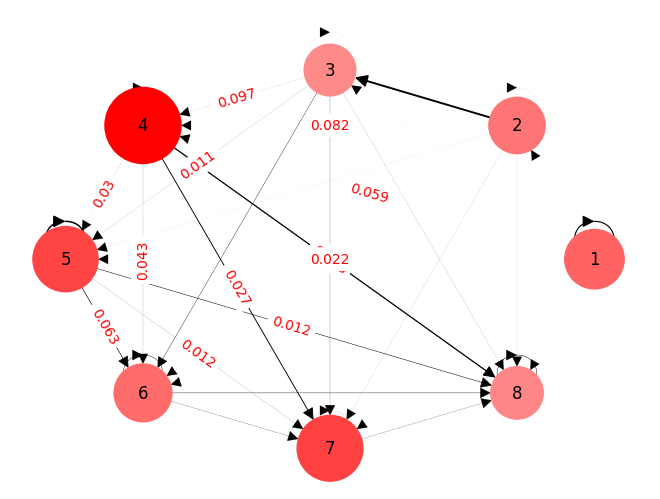

In [ ]:
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(np.array([str(i + 1) for i in range(len(ind_big_sectors))]))
edges = []
for i in range(len(big_sectors)):
    for j in range(len(big_sectors)):
        edges.append((str(i + 1), str(j + 1)))
G.add_edges_from(edges)
max_x = max(X[ind_big_sectors])
node_colors = [(1, 1 - x / max_x, 1 - x / max_x) for x in X[ind_big_sectors]]
options = {
    'node_color': node_colors,
    'node_size': list(3000 * X[ind_big_sectors] / max(X[ind_big_sectors])),
    'width': list(4 * A_ar / max(A_ar)),
    'arrowstyle': '-|>',
    'arrowsize': 18,
}
pos = nx.circular_layout(G)
nx.draw(G, pos,with_labels = True, arrows=True, **options)
edge_labels = dict()
for i in range(len(big_sectors)):
    for j in range(len(big_sectors)):
        if A_local[i, j] > 0.01:
            edge_labels[(str(i + 1), str(j + 1))] = round(A_local[i, j], 3)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels,
    font_color='red'
)
for i in range(len(big_sectors)):
    print(f"{i + 1} - {big_sectors[i]}")

In [ ]:
A2 = np.matmul(A, A)
A_local2 = A2[np.ix_(ind_big_sectors, ind_big_sectors)]
A_local2
A_ar2 = np.array(A_local2).reshape(-1, )

1 - Mining and quarrying, energy producing products , Wholesale and retail trade; repair of motor vehicles
2 - Mining and quarrying, non-energy producing products
3 - Food products, beverages and tobacco
4 - Construction
5 - Financial and insurance activities
6 - Real estate activities
7 - Public administration and defence; compulsory social security
8 - Education


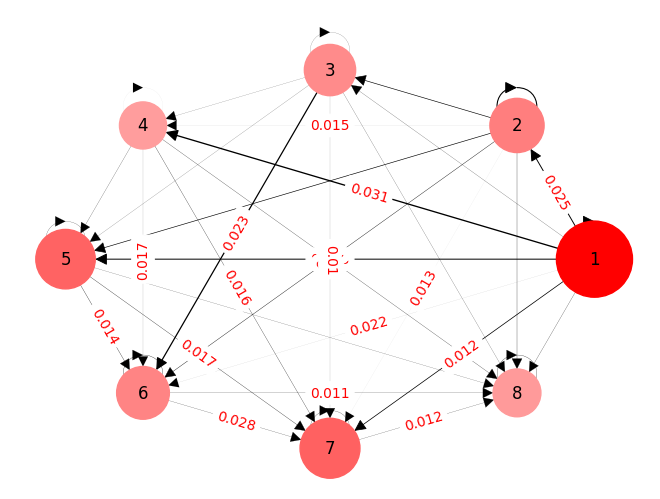

In [ ]:
G = nx.Graph()
G.add_nodes_from(np.array(["1", "2", "3", "4", "5", "6", "7"]))
edges = []
for i in range(len(big_sectors)):
    for j in range(len(big_sectors)):
        edges.append((str(i+1), str(j+1)))
G.add_edges_from(edges)
node_colors = X[ind_big_sectors] / max(X[ind_big_sectors])
max_x = max(X[ind_big_sectors])
node_colors = [(1, 1 - x / max_x, 1 - x / max_x) for x in X[ind_big_sectors]]
options = {
    'node_color': node_colors,
    'node_size': list(3000 * X[ind_big_sectors] / max(X[ind_big_sectors])),
    'width': list(4 * A_ar2 / max(A_ar2)),
    'arrowstyle': '-|>',
    'arrowsize': 18,
}
pos = nx.circular_layout(G)
nx.draw(G, pos,with_labels = True, arrows=True, **options)
#ax = plt.gca()
#ax.collections[0].set_edgecolor("#000000")
#ax.text(1,1,'December', style='italic')

edge_labels = dict()
for i in range(len(big_sectors)):
    for j in range(len(big_sectors)):
        if A_local2[i,j] > 0.01:
            edge_labels[(str(i+1), str(j+1))] = round(A_local2[i,j], 3)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels,
    font_color='red'
)

for i in range(len(big_sectors)):
    print(f"{i+1} - {big_sectors[i]}")